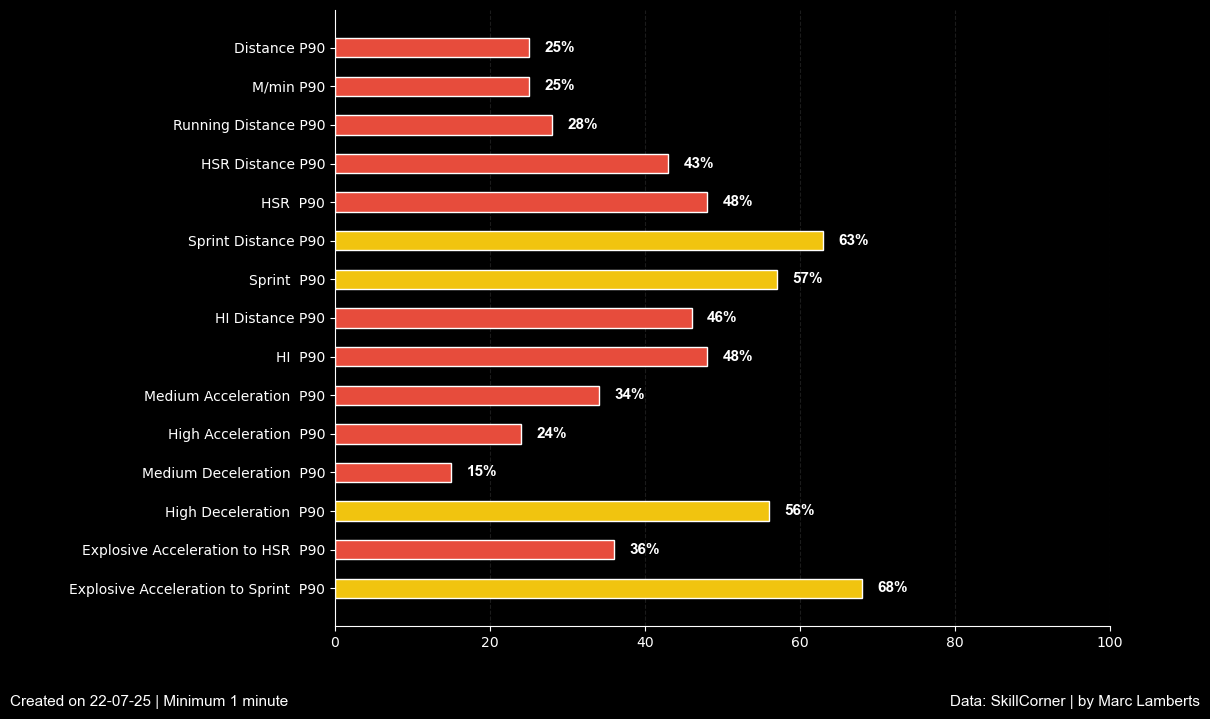

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from datetime import datetime
import matplotlib.image as mpimg
import os


# Load and filter data
file_path = '/Users/user/Downloads/SkillCorner-2025-07-22.csv'

# === 4. Player Setup ===
players = ["T. Nemčík"]

# === 5. Load and Clean Data ===
df_original = pd.read_csv(file_path, sep=';', quotechar='"')
df_original.columns = df_original.columns.str.strip()
df_filtered = df_original[df_original['Minutes'] >= 1].copy()

# === 6. Define Metrics Manually ===
params = [
    'Distance P90',
    'M/min P90',
    'Running Distance P90',
    'HSR Distance P90',
    'HSR Count P90',
    'Sprint Distance P90',
    'Sprint Count P90',
    'HI Distance P90',
    'HI Count P90',
    'Medium Acceleration Count P90',
    'High Acceleration Count P90',
    'Medium Deceleration Count P90',
    'High Deceleration Count P90',
    'Explosive Acceleration to HSR Count P90',
    'Explosive Acceleration to Sprint Count P90'
]

# === 7. Setup Plot ===
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
fig.patch.set_facecolor("black")

# === 8. Plot Player ===
player_name = players[0]

# --- Get Player Info ---
player_data = df_filtered[df_filtered['Short Name'] == player_name]
if player_data.empty:
    ax.text(0.5, 0.5, f"{player_name}\nNot found in data", ha='center', va='center',
            fontsize=14, color='white', fontweight='bold')
    ax.axis('off')
else:
    player_team = player_data['Team'].values[0]
    player_minutes = player_data['Minutes'].values[0]

    # --- Prepare Metrics ---
    df_metrics = df_filtered[['Short Name'] + params].dropna().reset_index(drop=True)
    player_df = df_metrics[df_metrics['Short Name'] == player_name].reset_index(drop=True)
    player_stats = list(player_df.loc[0, params])
    values = [math.floor(stats.percentileofscore(df_metrics[param], player_stats[i])) for i, param in enumerate(params)]
    values = [99 if v == 100 else v for v in values]

    # --- Bar Colors ---
    bar_colors = []
    for v in values:
        if v < 50:
            bar_colors.append("#e74c3c")
        elif v < 75:
            bar_colors.append("#f1c40f")
        else:
            bar_colors.append("#2ecc71")

    # --- Plot Bars ---
    ax.set_facecolor("black")
    # Cleaned labels for display
    display_labels = [param.replace("Count", "").strip() for param in params]
    bars = ax.barh(display_labels, values, color=bar_colors, edgecolor="white", height=0.5)


    for bar, val in zip(bars, values):
        ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2,
                f"{val}%", va="center", ha="left",
                fontsize=11, color="white", fontweight="bold", fontname="Arial")

    # --- Style Axes ---
    ax.set_xlim(0, 100)
    ax.invert_yaxis()
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.xaxis.grid(True, linestyle="--", color="#444444", alpha=0.4)
    ax.set_axisbelow(True)

  
# === 9. Footer ===
today_date = datetime.today().strftime("%d-%m-%y")
fig.text(-0.2, 0.01, f"Created on {today_date} | Minimum 1 minute", fontsize=11, color="white", fontname="Arial")
fig.text(0.99, 0.01, "Data: SkillCorner | by Marc Lamberts", fontsize=11, color="white", ha="right", fontname="Arial")

# === 10. Save and Show ===
plt.savefig('/Users/user/Downloads/player_bar_chart.png', dpi=500, facecolor='black')

plt.show()

Image saved to: /Users/user/Downloads/gyokeres_npg_percentile.png


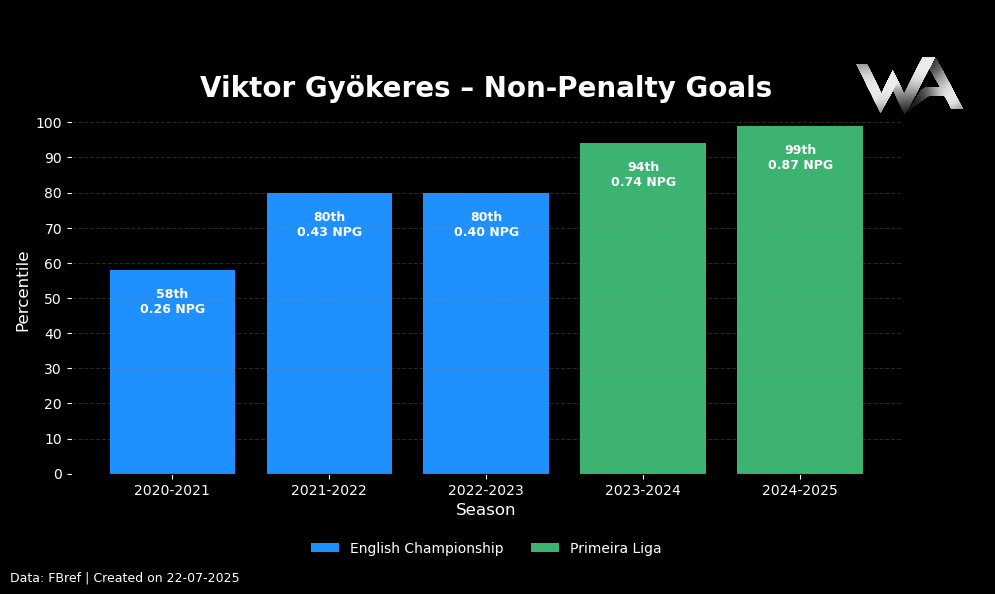

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# === 1. Data ===
seasons = ['2020-2021', '2021-2022', '2022-2023', '2023-2024', '2024-2025']
npg_values = [0.26, 0.43, 0.40, 0.74, 0.87]
percentiles = [58, 80, 80, 94, 99]
leagues = ['English Championship', 'English Championship', 'English Championship', 'Primeira Liga', 'Primeira Liga']
colors = ['dodgerblue' if league == 'English Championship' else 'mediumseagreen' for league in leagues]

# === 2. Setup Figure ===
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# === 3. Create Bars ===
bars = ax.bar(seasons, percentiles, color=colors)

# === 4. Add Labels Inside Bars ===
for i in range(len(seasons)):
    ax.text(i, percentiles[i] - 5,
            f"{percentiles[i]}th\n{npg_values[i]:.2f} NPG",
            ha='center', va='top', fontsize=9, color='white', fontweight='bold')

# === 5. Style Axes ===
ax.set_ylabel("Percentile", fontsize=12, color='white')
ax.set_xlabel("Season", fontsize=12, color='white')
ax.set_title("Viktor Gyökeres – Non-Penalty Goals", fontsize=20, fontweight='bold', color='white')
ax.set_ylim(0, 105)
ax.set_yticks(range(0, 101, 10))
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.grid(axis='y', linestyle='--', alpha=0.3, color='gray')

# === 6. Add Legend Below ===
legend_elements = [
    Patch(facecolor='dodgerblue', label='English Championship'),
    Patch(facecolor='mediumseagreen', label='Primeira Liga')
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, frameon=False, fontsize=10, labelcolor='white')

# === 7. Add Logo ===
logo_path = '/Users/user/Downloads/wa2.png'
logo_img = mpimg.imread(logo_path)
imagebox = OffsetImage(logo_img, zoom=0.1)
ab = AnnotationBbox(imagebox, (1.01, 1.05), xycoords='axes fraction', frameon=False)
ax.add_artist(ab)

from datetime import datetime

# === 9. Add Source and Date ===
today = datetime.today().strftime('%d-%m-%Y')
fig.text(0.01, 0.01, f"Data: FBref | Created on {today}", color='white', fontsize=9, ha='left', va='bottom')

# === 10. Save as PNG ===
output_path = '/Users/user/Downloads/gyokeres_npg_percentile.png'
plt.savefig(output_path, dpi=300, facecolor='black', bbox_inches='tight')
print(f"Image saved to: {output_path}")

# === 11. Show Plot ===
plt.tight_layout()
plt.show()

# === 8. Final Layout ===
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/Users/user/Downloads/optaporen.xlsx')

# Check the column names (adjust if needed)
print(df.columns)


Index(['Rank', 'Team', 'Rating', 'League'], dtype='object')


In [14]:
# Group by league and calculate mean rating
league_avg = df.groupby('League')['Rating'].mean().reset_index()


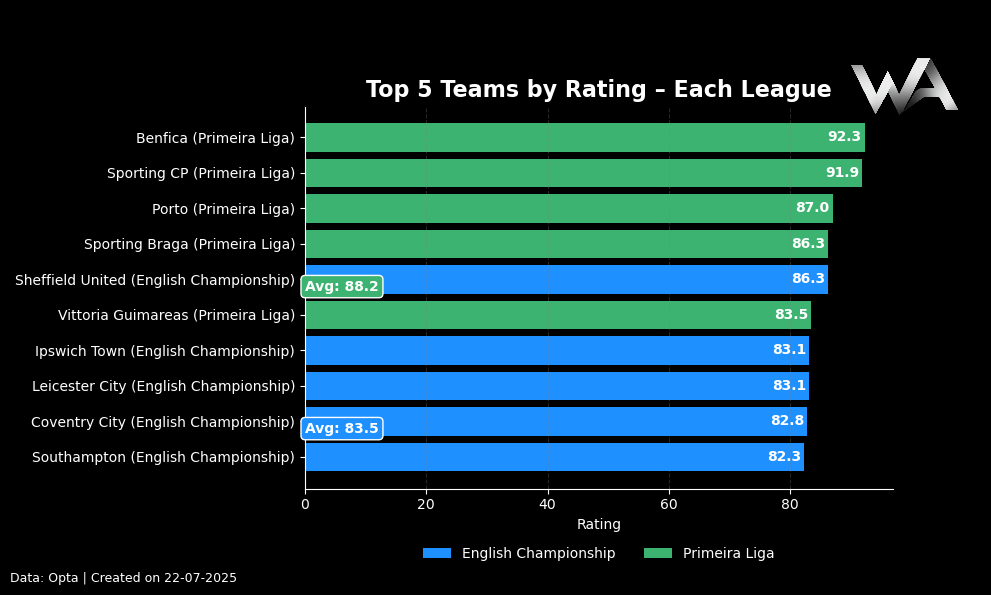

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from datetime import datetime
from matplotlib.patches import Patch

# === 1. Load Excel Data ===
df = pd.read_excel('/Users/user/Downloads/optaporen.xlsx')

# === 2. Get Top 5 Teams by Rating in Each League ===
top5_eng = df[df['League'] == 'English Championship'].nlargest(5, 'Rating')
top5_por = df[df['League'] == 'Primeira Liga'].nlargest(5, 'Rating')

# === 3. Combine and Create Labels ===
top5_combined = pd.concat([top5_eng, top5_por])
top5_combined['Label'] = top5_combined['Team'] + ' (' + top5_combined['League'] + ')'
top5_combined = top5_combined.sort_values(by='Rating')

# === 4. Setup Plot ===
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# === 5. Bar Colors ===
colors = ['dodgerblue' if league == 'English Championship' else 'mediumseagreen'
          for league in top5_combined['League']]

# === 6. Plot Horizontal Bars ===
bars = ax.barh(top5_combined['Label'], top5_combined['Rating'], color=colors)

# === 7. Add Rating Text Inside Bars ===
for bar in bars:
    width = bar.get_width()
    ax.text(width - 0.5, bar.get_y() + bar.get_height()/2,
            f"{width:.1f}", ha='right', va='center', color='white', fontsize=10, fontweight='bold')

# === 8. Axis Styling ===
ax.set_title("Top 5 Teams by Rating – Each League", fontsize=16, color='white', weight='bold')
ax.set_xlabel("Rating", color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.grid(axis='x', linestyle='--', alpha=0.3, color='gray')

# === 9. Add Average Rating Boxes at Top Left of Each League Group ===
avg_eng = top5_eng['Rating'].mean()
avg_por = top5_por['Rating'].mean()

for league, color, avg in [
    ("English Championship", 'dodgerblue', avg_eng),
    ("Primeira Liga", 'mediumseagreen', avg_por)
]:
    for bar, league_name in zip(bars, top5_combined['League']):
        if league_name == league:
            y = bar.get_y() + bar.get_height()  # top of the bar
            ax.text(0.05, y + 0.2,
                    f"Avg: {avg:.1f}",
                    color='white', fontsize=10, weight='bold',
                    ha='left', va='bottom',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor=color, edgecolor='white'))
            break  # only one per league

# === 10. Add Legend Under Plot ===
legend_elements = [
    Patch(facecolor='dodgerblue', label='English Championship'),
    Patch(facecolor='mediumseagreen', label='Primeira Liga')
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.12),
          ncol=2, frameon=False, fontsize=10, labelcolor='white')

# === 11. Add Logo ===
logo_img = mpimg.imread('/Users/user/Downloads/wa2.png')
imagebox = OffsetImage(logo_img, zoom=0.1)
ab = AnnotationBbox(imagebox, (1.02, 1.05), xycoords='axes fraction', frameon=False)
ax.add_artist(ab)

# === 12. Footer ===
today = datetime.today().strftime('%d-%m-%Y')
fig.text(0.01, 0.01, f"Data: Opta | Created on {today}", fontsize=9, color='white', ha='left', va='bottom')

# === 13. Save & Show ===
plt.tight_layout()
plt.savefig('/Users/user/Downloads/top5_teams_by_league.png', dpi=300, facecolor='black', bbox_inches='tight')
plt.show()
